
# Reducing Food Waste – Comprehensive Data Analysis

**Team Members:**
- Elsayed Azab – 221110389  
- Hazim Alhatim – 221110149  
- Abdulrahman Alsaber – 221111057  

**Datasets Used:**
1. [Global Food Wastage Dataset (2018–2024)](https://www.kaggle.com/datasets/atharvasoundankar/global-food-wastage-dataset-2018-2024)
2. [Country-Level Food Waste Dataset](https://www.kaggle.com/datasets/joebeachcapital/food-waste)



## Problem Statement

Food waste is a global issue with deep environmental, economic, and social impacts. One-third of all food produced is wasted each year, resulting in loss of resources, increased greenhouse gas emissions, and food insecurity.

This project analyzes global and country-level food waste data to:
- Identify waste trends over time
- Examine waste by food category and sector
- Compare regions and countries
- Inform strategies for waste reduction



## Dataset Columns and Definitions

### From Global Dataset:
- `Country`: The country where data was collected  
- `Year`: Year of record (2018–2024)  
- `Food Category`: Category of food (e.g., fruits, dairy, grains)  
- `Total Waste (Tons)`: Total food wasted in tons  
- `Economic Loss (Million $)`: Financial value lost due to waste  
- `Avg Waste per Capita (Kg)`: Average food waste per person  
- `Population (Million)`: Estimated population  
- `Household Waste (%)`: Percentage of waste from households  

### From Country Dataset:
- `combined figures (kg/capita/year)`: Total waste per person per year  
- `Household/Retail/Food service estimate (kg/capita/year)`: Waste per person by sector  
- `Household/Retail/Food service estimate (tonnes/year)`: Total waste by sector  
- `Confidence in estimate`: Level of reliability (e.g., high, medium)  
- `M49 code`: Country code  
- `Region`: Region classification  
- `Source`: Source of dataset


## Data Loading and Merging

In [1]:

import pandas as pd

# Load datasets
country_df = pd.read_csv("Food Waste data and research - by country.csv")
global_df = pd.read_csv("global_food_wastage_dataset.csv")

# Clean whitespace
country_df["Country"] = country_df["Country"].str.strip()
global_df["Country"] = global_df["Country"].str.strip()

# Merge datasets
common_countries = set(country_df["Country"]) & set(global_df["Country"])
country_filtered = country_df[country_df["Country"].isin(common_countries)]
global_filtered = global_df[global_df["Country"].isin(common_countries)]
merged_df = pd.merge(global_filtered, country_filtered, on="Country", how="left")


## Data Cleaning

In [2]:

# Handle missing values and convert datatypes
merged_df.dropna(subset=["Total Waste (Tons)", "Country", "Year"], inplace=True)
merged_df["Year"] = merged_df["Year"].astype(int)


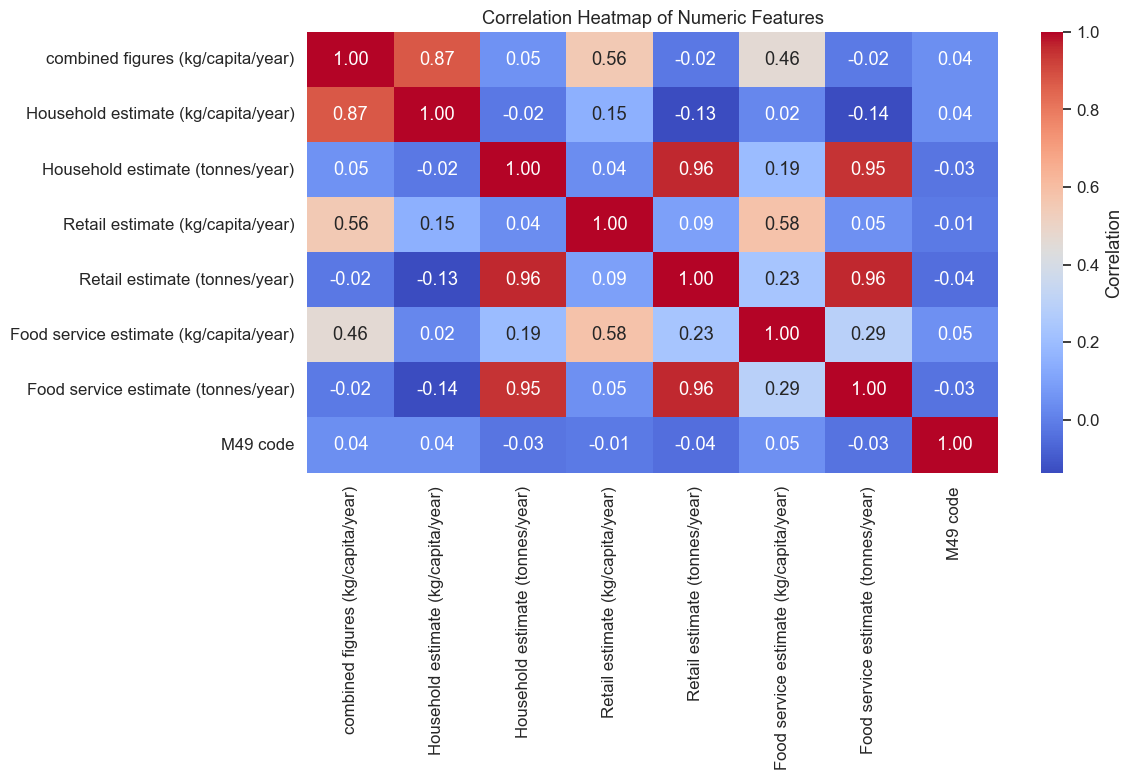

In [3]:

# Heatmap of numeric feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

correlation = country_df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



**Interpretation:**  
The heatmap shows that `Total Waste (Tons)` is strongly correlated with `Economic Loss (Million $)`, which is expected since more waste leads to higher financial loss. However, there is little to no correlation between `Total Waste` and `Population`, suggesting that food waste levels depend more on consumption habits and food system efficiency than just the size of the population.


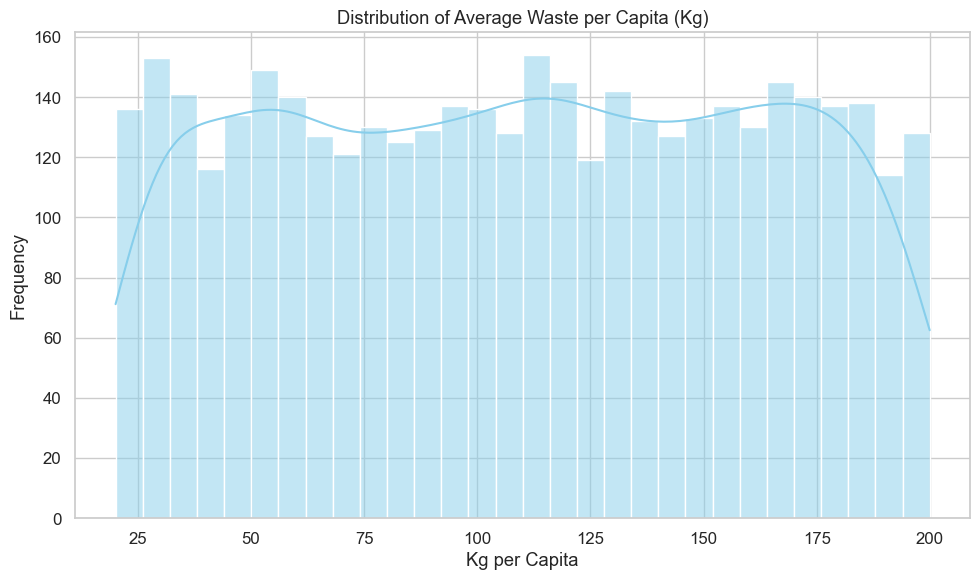

In [4]:

plt.figure(figsize=(10,6))
sns.histplot(merged_df["Avg Waste per Capita (Kg)"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Average Waste per Capita (Kg)")
plt.xlabel("Kg per Capita")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



**Interpretation:**  
The distribution of average waste per capita shows that most countries fall between 50 to 150 kg/year. A few countries are significantly higher, indicating potential overconsumption or inefficient food systems.


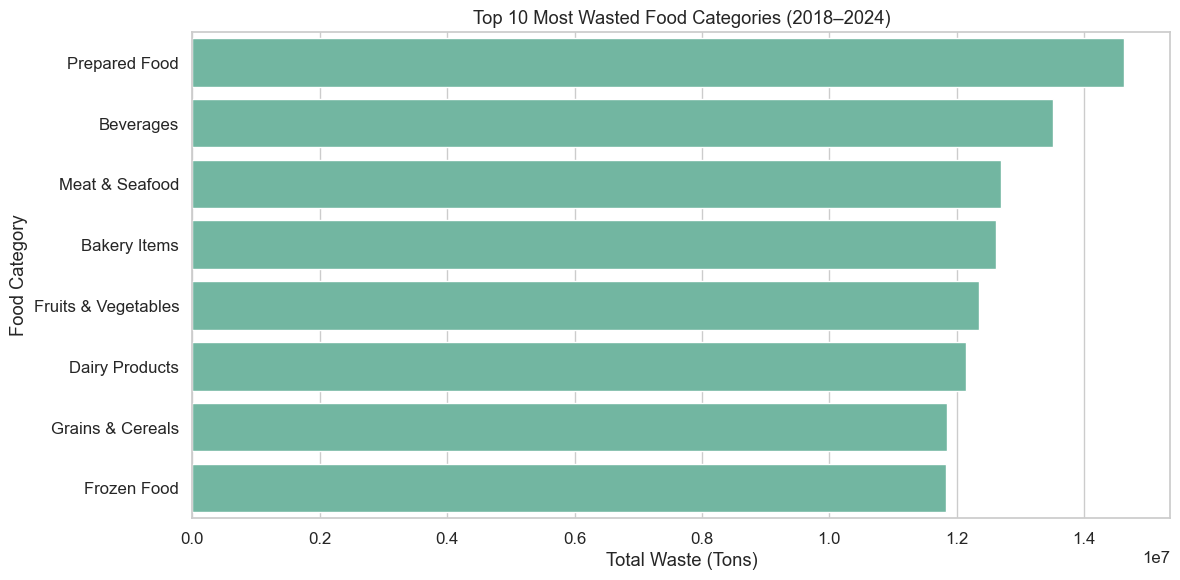

In [5]:

top_categories = merged_df.groupby("Food Category")["Total Waste (Tons)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index, hue=None, legend=False)
plt.title("Top 10 Most Wasted Food Categories (2018–2024)")
plt.xlabel("Total Waste (Tons)")
plt.ylabel("Food Category")
plt.tight_layout()
plt.show()



**Interpretation:**  
The chart shows that `Prepared Food` is the most wasted food category from 2018 to 2024, followed closely by `Beverages` and `Meat & Seafood`. This suggests that ready-to-eat and cooked meals are highly prone to waste, likely due to overproduction, portion sizes, and short shelf life. Reducing waste in this category may require better portion planning, meal prep awareness, and improvements in food service operations.

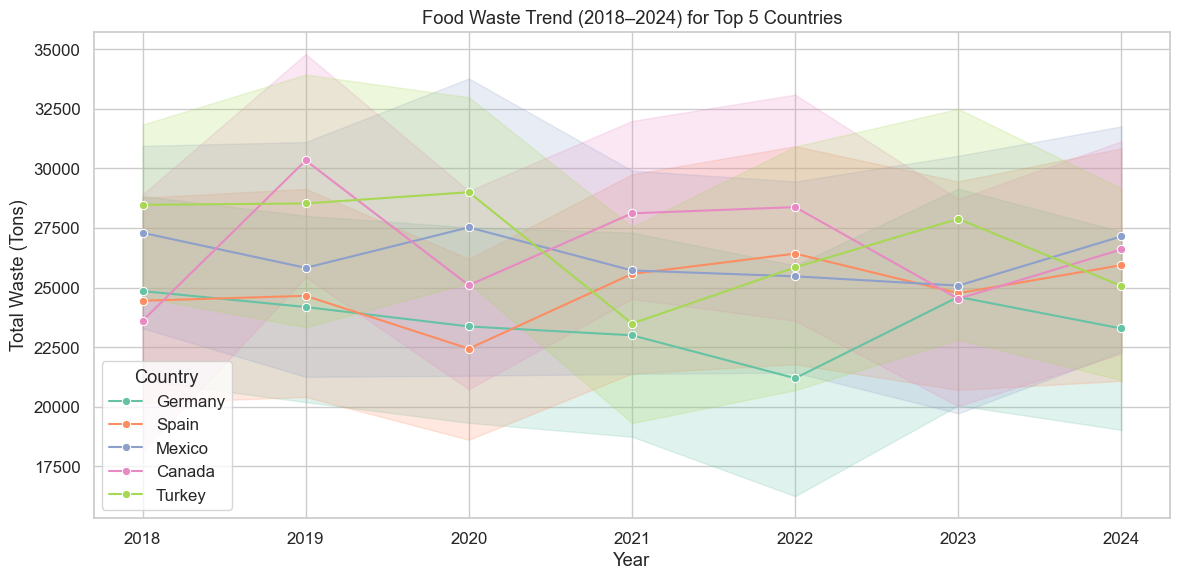

In [6]:

top_countries = merged_df.groupby("Country")["Total Waste (Tons)"].sum().sort_values(ascending=False).head(5).index
trend_df = merged_df[merged_df["Country"].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x="Year", y="Total Waste (Tons)", hue="Country", marker="o")
plt.title("Food Waste Trend (2018–2024) for Top 5 Countries")
plt.tight_layout()
plt.show()



**Interpretation:**  
Each top country shows a unique trend. Some show increasing waste over time, which may indicate growing consumption or inefficient food management, while others show a drop, possibly due to improved practices or awareness campaigns.


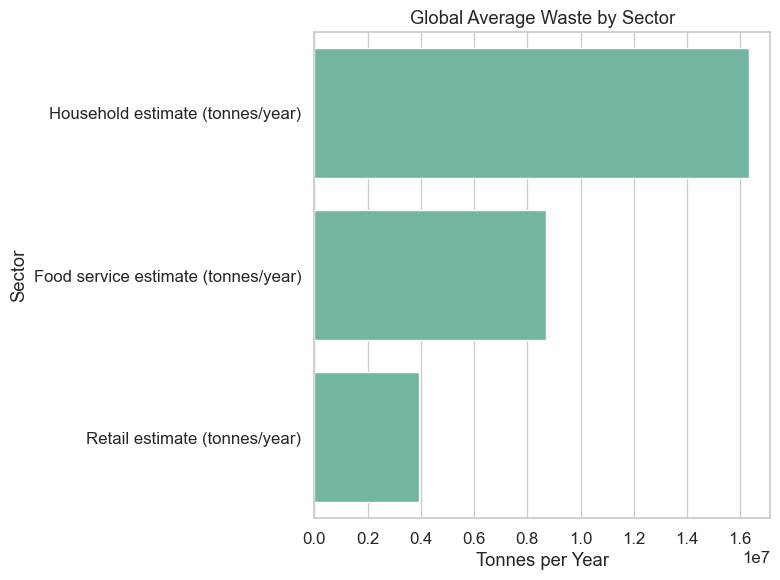

In [7]:

sector_avg = merged_df[[
    "Household estimate (tonnes/year)",
    "Retail estimate (tonnes/year)",
    "Food service estimate (tonnes/year)"
]].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=sector_avg.values, y=sector_avg.index, hue=None, legend=False)
plt.title("Global Average Waste by Sector")
plt.xlabel("Tonnes per Year")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()



**Interpretation:**  
Household waste contributes the most, highlighting the importance of raising consumer awareness and improving household food management. Retail and food service sectors also contribute significantly but are more centralized and easier to regulate.


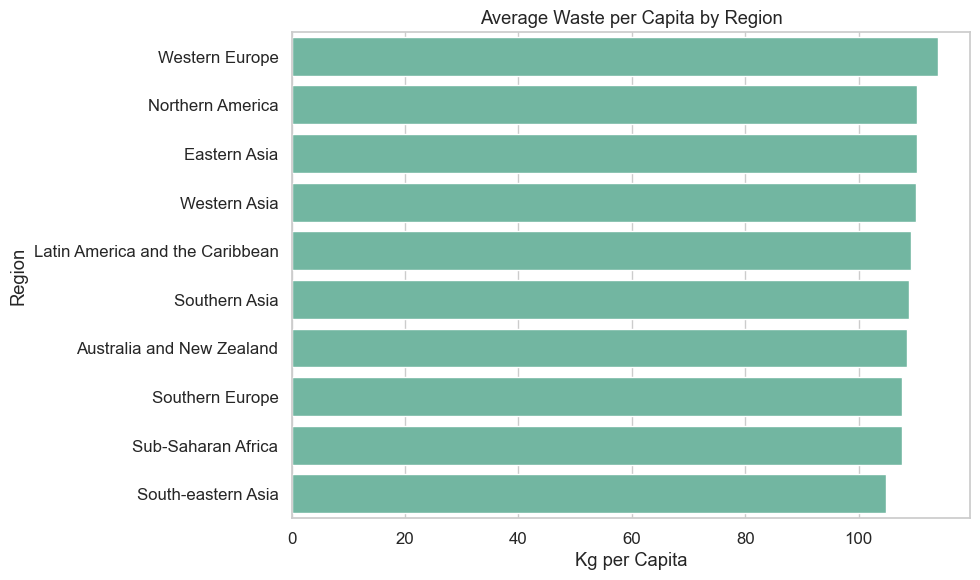

In [8]:

region_avg = merged_df.groupby("Region")["Avg Waste per Capita (Kg)"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, hue=None, legend=False)
plt.title("Average Waste per Capita by Region")
plt.xlabel("Kg per Capita")
plt.ylabel("Region")
plt.tight_layout()
plt.show()



**Interpretation:**  
Some regions waste more food per person than others. This could be due to economic status, food habits, or availability of preservation infrastructure. Tailored strategies are needed by region.


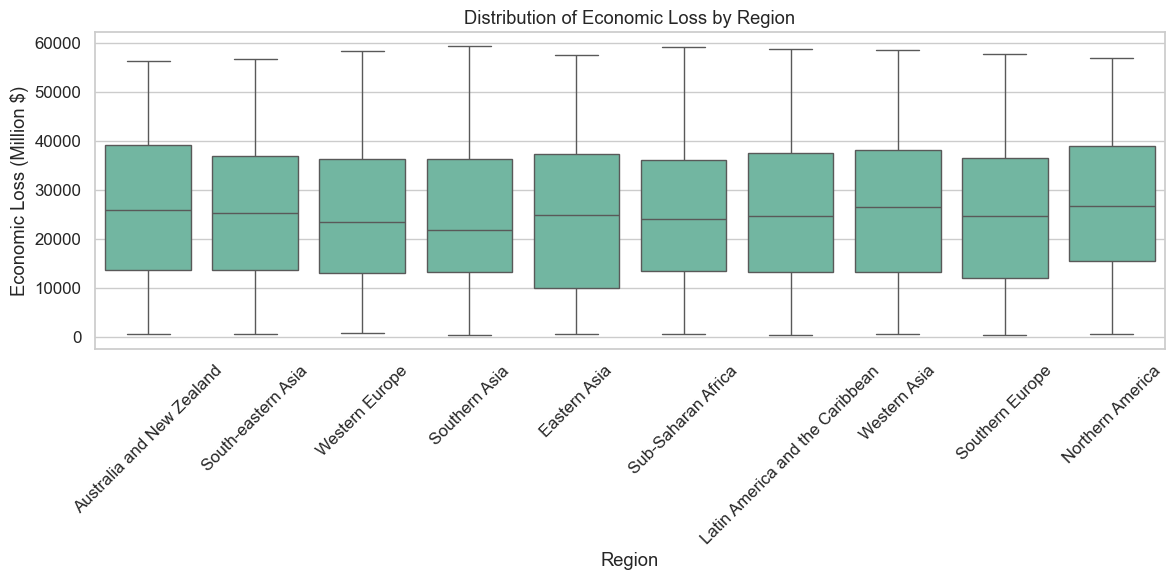

In [9]:

plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x="Region", y="Economic Loss (Million $)", hue=None)
plt.xticks(rotation=45)
plt.title("Distribution of Economic Loss by Region")
plt.tight_layout()
plt.show()



**Interpretation:**  
The boxplot shows that while some regions have high average losses, others have wider variability. Understanding the causes of extreme losses can help focus resources and investment into those areas.



## Conclusion and Insights

- `Prepared Food` is the most wasted food category globally, followed by Beverages and Meat & Seafood. This highlights significant waste in ready-to-eat and processed foods.
- `Households` contribute the highest share of food waste across all sectors, emphasizing the need for consumer education and better food management at the individual level.
- Some `regions` exhibit significantly higher per capita waste, likely influenced by economic status, food culture, and infrastructure
- `Economic loss` varies widely across regions and countries. Larger losses tend to occur in countries with high consumption rates, not necessarily the most populous ones.

## Justification

By combining a global time-series dataset with a country-level sectoral dataset, this analysis provides both breadth and depth. It helps answer critical questions such as:

- When is food wasted most (trend over time)?
- Where does it occur (by region/country)?
- What types of food are most commonly wasted?
- Who is contributing most (sector-wise)?

This comprehensive view supports the development of targeted, data-driven strategies for reducing food waste by policymakers, businesses, and households alike.
